# Ejercicios Pair Programming 
## Lecci√≥n 11 - Regresi√≥n Lineal Decision Tree

En el pair programming de hoy deb√©is usar el csv que guardast√©is cuando hicist√©is el pairprgramming de codificicaci√≥n (este csv deber√≠a tener las variables estadandarizas).

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gr√°ficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluaci√≥n
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuraci√≥n warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_csv("supermercado_encoding.csv", index_col=0)

In [3]:
df.head()

income  numdealspurchases  numstorepurchases  numwebvisitsmonth  \
0  1.608976          -0.701068           0.052191          -1.803407   
1  0.264394          -0.701068           0.361131          -0.142553   
2  0.757562          -0.701068          -0.256748          -1.388194   
3 -0.928642          -0.701068          -1.183568           0.687874   
4 -1.461745          -0.170569          -1.183568           0.687874   

   numwebpurchases_sklearn  marital_status_oe  
0                 0.363636                7.0  
1                 0.636364                3.0  
2                 0.272727                6.0  
3                 0.090909                5.0  
4                 0.272727                3.0

En pairprogramming anteriores ajustast√©is vuestro datos a una regresi√≥n lineal. El objetivo de hoy es:

Ajustar el modelo a un Decision Tree

In [6]:
# Separamos nuestra dataframe en dos al igual que en la Regresi√≥n Lineal.

X = df.drop("numwebpurchases_sklearn", axis = 1)
y = df["numwebpurchases_sklearn"]

In [7]:
# Dividimos nuestros datos en train y test.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Creamos el objeto del modelo.
arbol = DecisionTreeRegressor(random_state =0)

# Ajustamos el modelo.
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

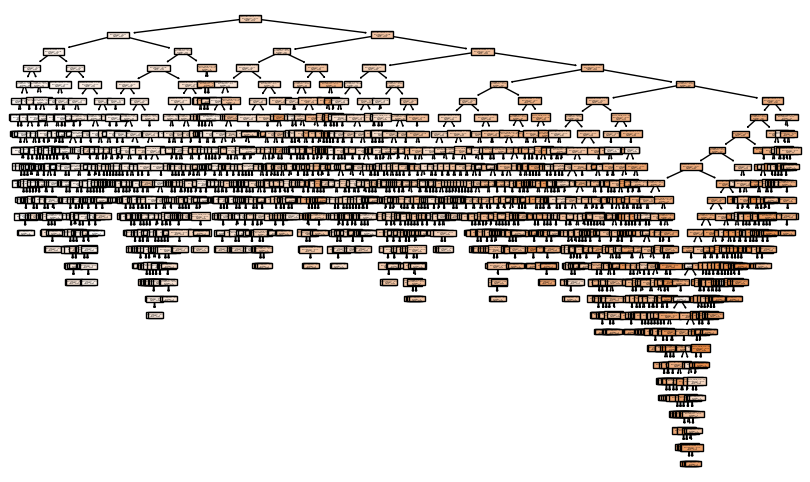

In [10]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

Observando la gr√°fica vemos que presenta overfitting, por lo que reduciremos la profundidad de nuestro modelo. Para esto tendremos que ver el par√°metro "max_features" que nos dice la ra√≠z cuadrada del n√∫mero de variables predictoras y el par√°metro "max_depth" que nos dice cu√°ntos hijos tiene nuestro √°rbol de decisi√≥n.

In [11]:
# Realizamos la ra√≠z cuadrada de max features para ver la profundidad de nuestro modelo. 

max_features = np.sqrt(len(x_train.columns))
max_features

2.23606797749979

In [12]:
# Vemos tambi√©n el par√°metro max_depth

print(arbol.tree_.max_depth)

27


Aunque gr√°ficamente ya nos dice que tiene overfitting, realizaremos la predicci√≥n para ver las m√©tricas de nuestro modelo y confirmar anal√≠ticamente lo visto en la gr√°fica.

In [13]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [14]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [15]:
# Sacamos los resultados de las m√©tricas

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

MAE           MSE          RMSE        R2    set            modelo
0  1.043150e-01  3.244849e-02  1.801346e-01  0.417782   test  Decission Tree I
1  2.748315e-18  1.582332e-34  1.257908e-17  1.000000  train  Decission Tree I

Comprobando de forma anal√≠ticas las m√©tricas de nuestro modelo, nos reafirmamos que hay overfitting ya que el train es mucho mejor que el test, es decir, las m√©tricas est√°n mucho mas bajas en el train que en el test, excepto en el R2 que est√°n mucho m√°s altas. En este caso nuestro modelo se est√°n aprendiendo de memoria los datos de entrenamiento y no ser√≠a capaz de hacer buenas predicciones fuera de este test.

Procederemos a reducir la profundidad del modelo usando GridSearchCV que nos realizar√° todas las posibles combinaciones de los hiperpar√°metros que vamos a cambiar.

In [17]:
df.shape

(2166, 6)

In [18]:
# Definimos un diccionario con los hiperpar√°metros que vamos a modificar.

param = {"max_depth": [4,6,8], 
        "max_features": [1,2,3],
        "min_samples_split": [20, 60, 200],
        "min_samples_leaf": [10,30,100]} 

In [19]:
# Iniciamos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [20]:
# Ajustamos el modelo 

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 30, 100],
                         'min_samples_split': [20, 60, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [21]:
# Ejecutamos "best_estimator_" para quedarnos con el mejor modelo que nos ha generado GridSearchCV a trav√©s de todas las
# combinaciones posibles que ha realizado.
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=20)

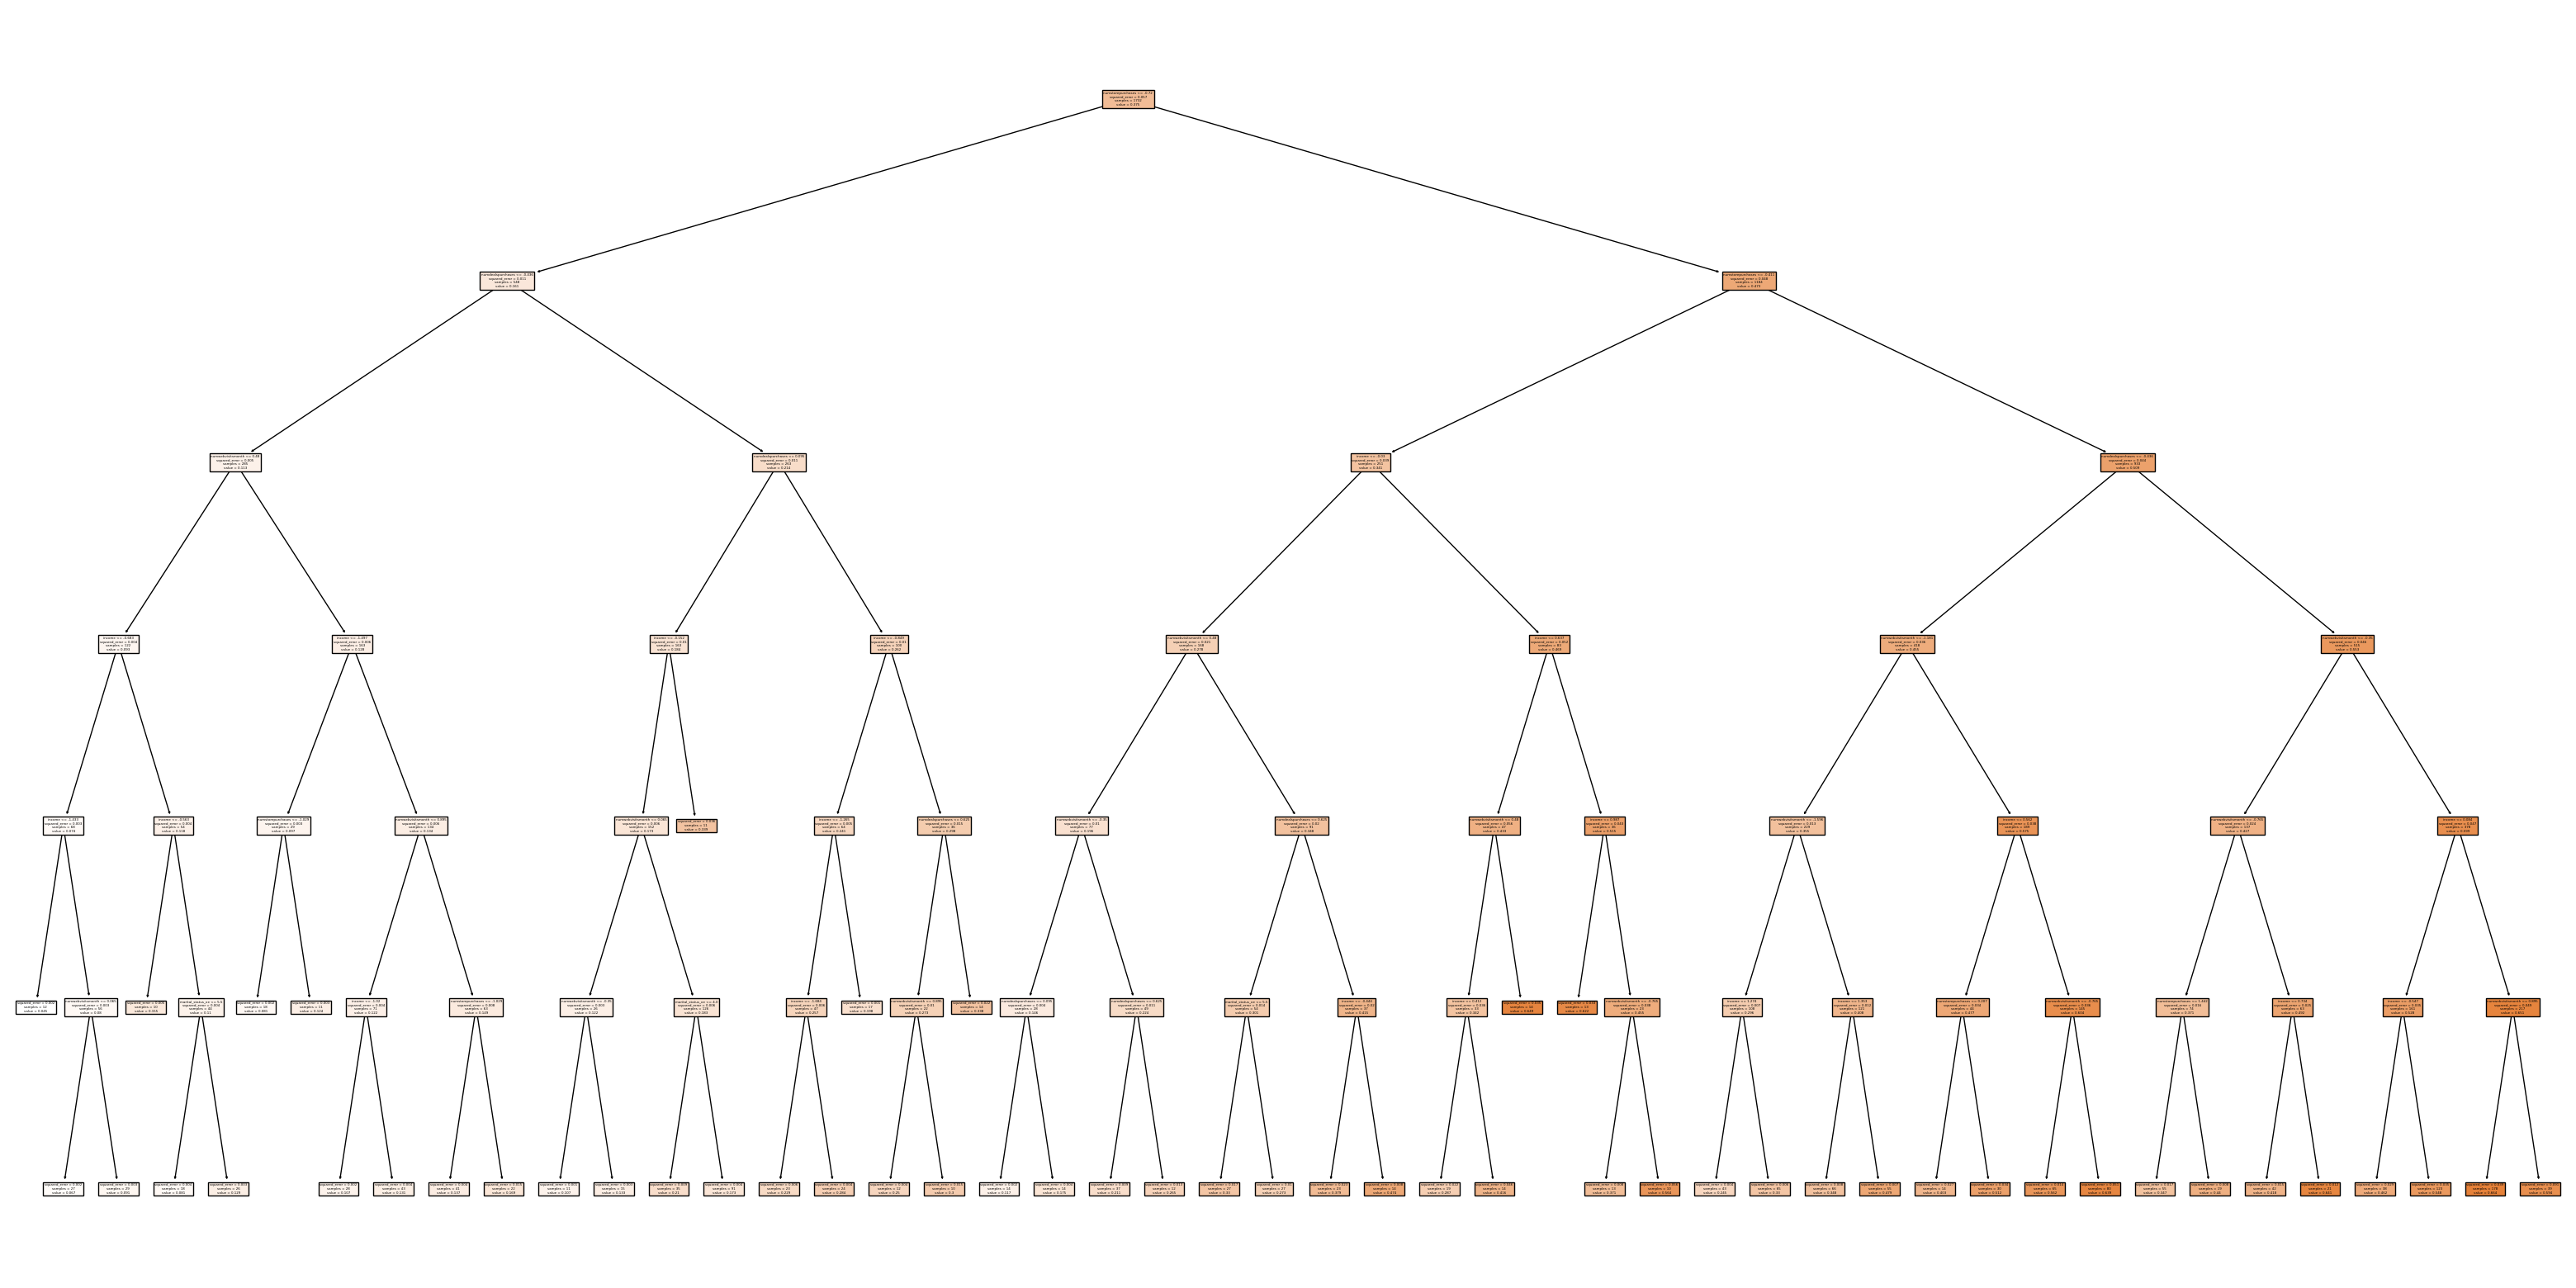

In [22]:
# Observamos con la gr√°fica de √°rbol la variable "mejor_modelo"

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [23]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

Extraer las m√©tricas

In [24]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

MAE       MSE      RMSE        R2    set            modelo
0  0.100601  0.020164  0.142001  0.638194   test  Decision tree II
1  0.098692  0.019269  0.138814  0.662455  train  Decision tree II

In [25]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

MAE           MSE          RMSE        R2    set            modelo
0  1.043150e-01  3.244849e-02  1.801346e-01  0.417782   test  Decission Tree I
1  2.748315e-18  1.582332e-34  1.257908e-17  1.000000  train  Decission Tree I
0  1.006009e-01  2.016438e-02  1.420013e-01  0.638194   test  Decision tree II
1  9.869192e-02  1.926934e-02  1.388141e-01  0.662455  train  Decision tree II

Observamos que nuestros resultados est√°n mucho m√°s ajustados, por lo que ya no hay overfitting y el modelo es mucho m√°s fiable y ser√° capaz de predecir y dar buenos resultados cuando se le a√±adan datos.

### Comparaci√≥n de m√©tricas de Regresi√≥n Lineal y Decision Tree I y II

In [27]:
df_regresion_lineal = pd.read_csv("supermercado_metricas.csv", index_col = 0)
df_regresion_lineal

MAE       MSE      RMSE        R2    set            modelo
0  0.117877  0.028165  0.167825  0.494634   test  Linear Regresion
1  0.122189  0.026079  0.161489  0.543177  train  LinearRegression

In [28]:
df_final = pd.concat([df_regresion_lineal, df_decision_results], axis = 0)
df_final

MAE           MSE          RMSE        R2    set            modelo
0  1.178767e-01  2.816536e-02  1.678254e-01  0.494634   test  Linear Regresion
1  1.221892e-01  2.607855e-02  1.614886e-01  0.543177  train  LinearRegression
0  1.043150e-01  3.244849e-02  1.801346e-01  0.417782   test  Decission Tree I
1  2.748315e-18  1.582332e-34  1.257908e-17  1.000000  train  Decission Tree I
0  1.006009e-01  2.016438e-02  1.420013e-01  0.638194   test  Decision tree II
1  9.869192e-02  1.926934e-02  1.388141e-01  0.662455  train  Decision tree II

Debatid entre vosotras que modelo es mejor y por qu√© (bas√°ndose en las m√©tricas)

Bas√°ndonos en las m√©tricas de los tres modelos de regresi√≥n se aprecia claramente que el m√°s efectivo es el modelo "Decision Tree II". Sus valores entre el train y el test est√°n muy ajustados, hay poca diferencia entre ellos, cosa que no pasa en el Decision Tree I. 

En cuanto a la comparaci√≥n con el modelo "Linear Regression" consideramos que las m√©tricas "MAE", "MSE" y "RMSE" no poseen una gran diferencia entre ambas, siendo √©stas bajas en ambos casos. Nos decantamos por "Decision Tree II" ya que su valor de R2 es m√°s elevado en esta m√©trica que en "Linear Regression", lo que nos da un mayor porcentaje de probabilidades de acierto.

In [29]:
df_final.to_csv("supermercado_metricas_tree_linear.csv")

### Importancia de las variables predictoras en nuestro modelo

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
2  numstorepurchases     0.646125
3  numwebvisitsmonth     0.182707
0             income     0.102825
1  numdealspurchases     0.066740
4  marital_status_oe     0.001603

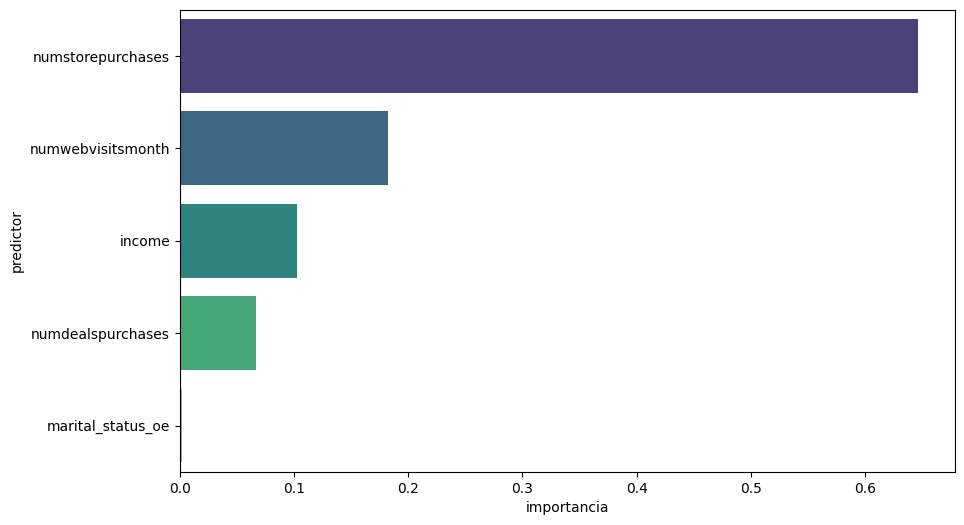

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Para nuestra sorpresa vemos que la variable que consider√°bamos m√°s importante a la hora de la predecir las compras online ha pasado a un tercer lugar, es decir, los ingresos no es la variable predictora m√°s importante sino el n√∫mero de compras en tienda. 

Con estos datos que nos da la gr√°fica suponemos que la encuesta fue respondida por mas gente de manera presencial que online, es decir, dicha encuesta se ha hecho en el propio supermercado (por lo que ya dichos encuestados est√°n comprando f√≠sicamente en el supermercado y hacen adem√°s compras online) y suponemos que tambi√©n se ha ofertado para responder online aunque no ha habido la misma aceptaci√≥n en este medio.

Happy codingüí™üèΩ